<a href="https://colab.research.google.com/github/fabrizioca2/ACS2024-1_GRUPO_06/blob/Aldair-Solis/Prueba_Valores_Algoritmo_Genetico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import numpy as np
import matplotlib.pyplot as plt
!pip install control
import control as ctrl

In [27]:
# Parámetros del sistema
M = 0.8  # Masa del carro (kg)
m = 0.23  # Masa del péndulo (kg)
l = 0.3  # Longitud del péndulo (m)
g = 9.81 # Aceleración de la gravedad (m/s²)


In [28]:
# Definir las ganancias
Kp = 50.24  # Ganancia proporcional
Ki = 21.91 # Ganancia integral
Kd = 6.08 # Ganancia derivativa

In [29]:
# Sistema G(s)
numerador_G = [1]
denominador_G = [(M*l), 0, -(M+m)*g]
G = ctrl.TransferFunction(numerador_G, denominador_G)
print(G)

<TransferFunction>: sys[58]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


       1
---------------
0.24 s^2 - 10.1



In [30]:
# Controladores P, PI, PD, PID
C_P = ctrl.TransferFunction([Kp], [1])
C_PI = ctrl.TransferFunction([Kp, Ki], [1, 0])
C_PD = ctrl.TransferFunction([Kd, Kp], [1])
C_PID = ctrl.TransferFunction([Kd, Kp, Ki], [1, 0])

In [31]:
# Lazo cerrado
T_P = ctrl.feedback(G * C_P)
T_PI = ctrl.feedback(G * C_PI)
T_PD = ctrl.feedback(G * C_PD)
T_PID = ctrl.feedback(G * C_PID)

In [32]:
# Tiempo de simulación
t = np.linspace(0, 4, 1000)

In [33]:
# Respuestas al escalón
time_PID, yout_PID = ctrl.step_response(T_PID, t)

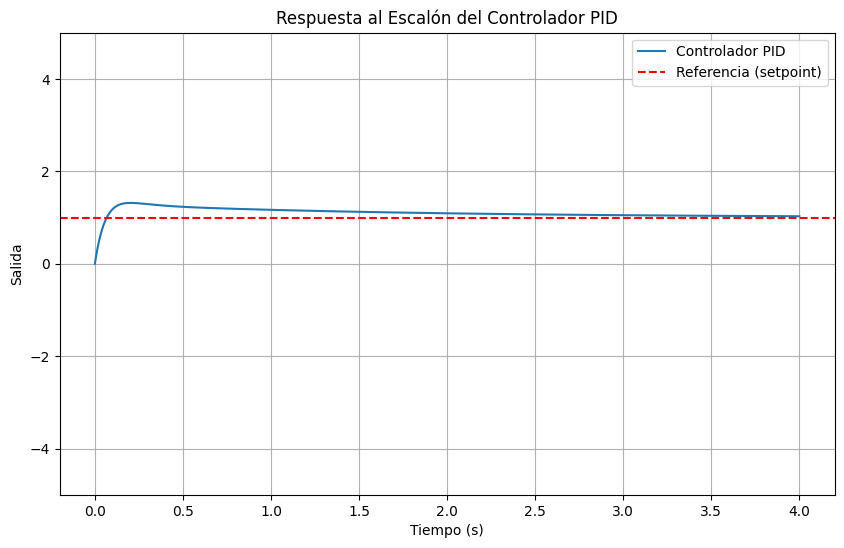

In [34]:
# Graficar las respuestas
plt.figure(figsize=(10, 6))
plt.plot(time_PID, yout_PID, label="Controlador PID")
plt.title("Respuesta al Escalón del Controlador PID")
plt.xlabel("Tiempo (s)")
plt.ylabel("Salida")
plt.axhline(y=1, color='r', linestyle='--', label="Referencia (setpoint)")
plt.legend()
plt.grid(True)
plt.ylim(-5, 5)
plt.show()